# script to graph opentuner log

In [120]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import pandas as pd

# graph exec time vs. time in log file (--results-log-details)
def graph_log(log_name):
    data = pd.read_csv(log_name, sep=" ", names=["wallclock", "exectime"])
    plt.plot(data["wallclock"], data["exectime"], '-+', label='tuned', linewidth=1)
    plt.xlabel("Tuning Time (s)")
    plt.ylabel("Execution Time (s)")
    plt.legend()
    plt.show()

In [121]:
# graph exec time vs. tuning time in log file (--results-log-details)
def graph_tuning(log_name, mesh2d=0.0, mesh3d=0.0, torus2d=0.0, torus3d=0.0, axis="time", last=0):
    data = pd.read_csv(log_name, sep=" ", names=["wallclock", "exectime"])
    best_times = []
    best_time = data["exectime"][0]
    best_times.append(best_time)
    worst_time = 0.0
    for i in range(1, len(data["exectime"])):
        if data["exectime"][i] < best_time:
            best_time = data["exectime"][i]
        best_times.append(best_time)
    if mesh2d > 0.0:
        plt.axhline(y=mesh2d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='red', label='2dmesh')
    if mesh3d > 0.0:
        plt.axhline(y=mesh3d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='blue', label='3dmesh')  
    if torus2d > 0.0:
        plt.axhline(y=torus2d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='green', label='2dtorus')   
    if torus3d > 0.0:
        plt.axhline(y=torus3d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='brown', label='3dtorus')     
    max_time = max(data["exectime"][0], mesh2d, mesh3d, torus2d, torus3d)
    min_time = min(best_time, mesh2d, mesh3d, torus2d, torus3d)
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    if last > 0:
        plt.xlim((0, last))
    if axis == "id":
        plt.plot(range(1, len(data)+1), best_times, '^-', label='tuned', color='black', linewidth=1, markersize=8)
        plt.xlabel("Number of Tests")
    else:
        plt.plot(data["wallclock"], best_times, '^-', label='tuned', color='black', linewidth=1, markersize=8)
        plt.xlabel("Tuning Time (s)")
    plt.ylabel("Execution Time (s)")
    plt.ylim(top=max_time+(max_time-min_time)*0.4, bottom=min_time*0.8)
    plt.tick_params(top=True, bottom=True, left=True, right=True, direction='in')
    plt.tick_params(which='major', length=4)
    plt.grid(False)
    plt.legend(frameon=False, fontsize=12, loc='upper right', ncol=3)
    plt.savefig(log_name+'.eps', bbox_inches='tight', transparent=True)
    plt.show()

In [168]:
import numpy as np                               
import matplotlib.pyplot as plt    

# percentage of tuning tests required to get close to the optimal execution time within the tuning period
def graph_tests(**logs):
    C1 = []
    C2 = []
    C3 = []
    for appname, logname in logs.items():
        data = pd.read_csv(logname, sep=" ", names=["wallclock", "exectime"])
        tmin = min(data["exectime"])
        ntests = len(data["exectime"])
        R1 = 0.0
        R2 = 0.0
        R3 = 0.0
        for i in range(ntests):
            if R1 == 0.0 and 1 - (data["exectime"][i] - tmin)/tmin > 0.7:
                R1 = (i+1)/ntests
            if R2 == 0.0 and 1 - (data["exectime"][i] - tmin)/tmin > 0.8:
                R2 = (i+1)/ntests
            if R3 == 0.0 and 1 - (data["exectime"][i] - tmin)/tmin > 0.9:
                R3 = (i+1)/ntests
                break
        C1.append(R1)
        C2.append(R2)
        C3.append(R3)

    # plot data in grouped manner of bar type
    x = np.arange(len(logs))
    width = 0.2
    plt.bar(x-0.2, C1, width, color='cyan')
    plt.bar(x, C2, width, color='orange')
    plt.bar(x+0.2, C3, width, color='green')
    plt.xticks(x, list(logs.keys()))
    plt.xlabel("Applications")
    plt.ylabel("Closeness to Optimal Execution Time")
    plt.legend(["C = 0.7", "C = 0.8", "C = 0.9"])
    plt.show()

graph_tests(CG="cg.A.64.log", MG="mg.A.64.log")

bt
sss
cg
xxx


# result of BT

In [123]:
# graph_tuning("bt.A.64.log", mesh2d=0.474705, mesh3d=0.32487, torus2d=0.110071, torus3d=0.191158)

# result of CG

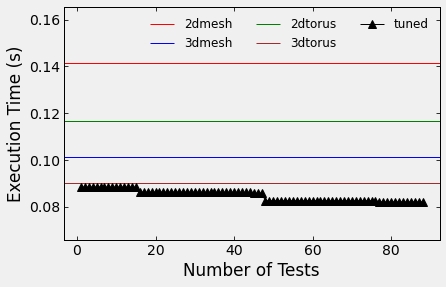

In [124]:
graph_tuning("cg.A.64.log", mesh2d=0.141583, mesh3d=0.10114, torus2d=0.116572, torus3d=0.0901337, axis="id")

# result of LU

# result of MG

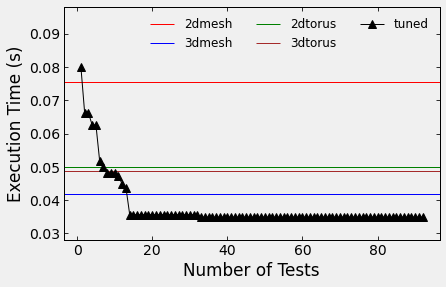

In [125]:
graph_tuning("mg.A.64.log", mesh2d=0.0754808, mesh3d=0.0417722, torus2d=0.0500303, torus3d=0.0486324, axis="id")

# result of SP

In [126]:
# graph_tuning("sp.A.64.log", mesh2d=0.812781, mesh3d=0.564094, torus2d=0.192574, torus3d=0.334719)

# result of FT

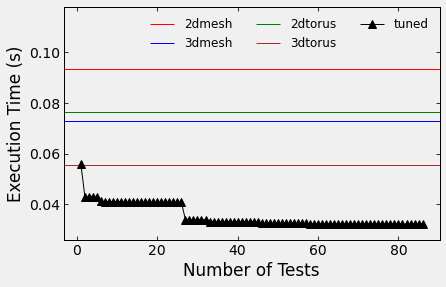

In [127]:
graph_tuning("ft.A.64.log", mesh2d=0.093472, mesh3d=0.0727775, torus2d=0.0763023, torus3d=0.0557767, axis="id")

# result of MM (-K 4096 -B 64)

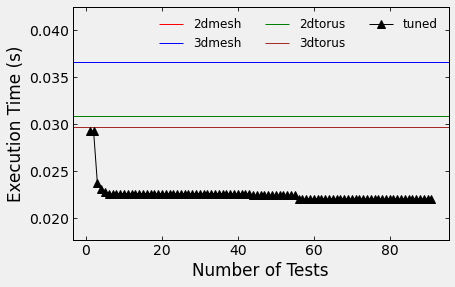

In [128]:
graph_tuning("gemm.64.log", mesh2d=0.0308161, mesh3d=0.0366104, torus2d=0.030889, torus3d=0.0297096, axis="id")

# Graph500 (64 8)

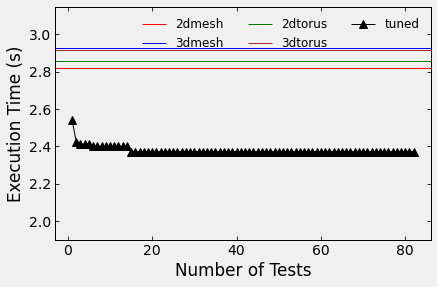

In [129]:
graph_tuning("graph500.64.log", mesh2d=2.82162, mesh3d=2.9246, torus2d=2.85462, torus3d=2.91363, axis="id")

# Himeno (S)

In [130]:
# graph_tuning("himeno.64.log", mesh2d=0.187648, mesh3d=0.138043, torus2d=0.142489, torus3d=0.107125)